In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Step 1: Upload and load the data
def load_data(file_path):
    """Load the dataset from the given file path."""
    data = pd.read_csv("/content/merge_data.csv")
    return data

# Step 2: Data preprocessing and metric calculation
def calculate_metrics(data):
    """Calculate metrics for Alexithymia analysis."""
    data['Pupil_Movement_Distance'] = np.sqrt(
        (data['Right_Pupil_X'] - data['Left_Pupil_X'])**2 +
        (data['Right_Pupil_Y'] - data['Left_Pupil_Y'])**2
    )

    metrics = pd.DataFrame(index=data['User'].unique())

    # Neutral Ratio
    neutral_ratio = (
        data[data['Emotion'] == 'neutral']
        .groupby('User')
        .size() / data.groupby('User').size()
    )
    metrics['Neutral_Ratio'] = neutral_ratio

    # Pupil Movement Distance
    movement_stats = data.groupby('User')['Pupil_Movement_Distance'].agg(['mean', 'std'])
    metrics['Pupil_Movement_Mean'] = movement_stats['mean']
    metrics['Pupil_Movement_Std'] = movement_stats['std']

    # Pupil Size Variability
    data['Pupil_Size'] = np.sqrt(
        (data['Right_Pupil_X'] - data['Left_Pupil_X'])**2 +
        (data['Right_Pupil_Y'] - data['Left_Pupil_Y'])**2
    )
    data['Pupil_Size_Change'] = data['Pupil_Size'].diff().fillna(0)
    metrics['Pupil_Size_Variability'] = data.groupby('User')['Pupil_Size_Change'].std()

    # Emotion Diversity
    def calculate_emotion_diversity(group):
        proportions = group.value_counts(normalize=True)
        return -np.sum(proportions * np.log(proportions + 1e-9))
    metrics['Emotion_Diversity'] = data.groupby('User')['Emotion'].apply(calculate_emotion_diversity)

    # Predicted Alexithymia
    metrics['Predicted_Alexithymia'] = (
        (metrics['Neutral_Ratio'] > 0.8) |
        (metrics['Emotion_Diversity'] < 1.0)
    )

    return metrics

# Step 3: Evaluate predictions
def evaluate_predictions(metrics, ground_truth):
    """Compare predicted results with ground truth and evaluate performance."""
    metrics['Ground_Truth'] = metrics.index.map(ground_truth)

    # Convert to binary labels for evaluation
    predicted_labels = metrics['Predicted_Alexithymia'].map({True: 1, False: 0})
    true_labels = metrics['Ground_Truth'].map({'Addicted': 1, 'Normal': 0})

    # Calculate confusion matrix and metrics
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    report = classification_report(true_labels, predicted_labels, target_names=['Normal', 'Addicted'])

    return metrics, conf_matrix, accuracy, report

# Step 4: Main script execution
if __name__ == "__main__":
    # File upload path
    file_path = 'your_file_path_here.csv'

    # Load the data
    data = load_data(file_path)

    # Calculate metrics
    metrics = calculate_metrics(data)

    # Ground truth mapping (update with your labels)
    updated_ground_truth = {
        'KIM SEO YEONG': 'Normal',
        'KIM SEO YEONG 2': 'Normal',
        'SEONG YOUN JUN': 'Normal',  # Correcting this as Normal
        'hha': 'Addicted',
        'hsm': 'Addicted',
        'kkk': 'Addicted',
        'kny': 'Normal',
        'ljk': 'Normal',
        'test1': 'Addicted'
    }

    # Evaluate predictions
    metrics, conf_matrix, accuracy, report = evaluate_predictions(metrics, updated_ground_truth)

    # Print results
    print("Confusion Matrix:")
    print(pd.DataFrame(conf_matrix, index=['Normal', 'Addicted'], columns=['Predicted Normal', 'Predicted Addicted']))
    print(f"\nAccuracy: {accuracy}")
    print("\nClassification Report:")
    print(report)


Confusion Matrix:
          Predicted Normal  Predicted Addicted
Normal                   3                   2
Addicted                 0                   4

Accuracy: 0.7777777777777778

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.60      0.75         5
    Addicted       0.67      1.00      0.80         4

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.78         9
weighted avg       0.85      0.78      0.77         9



<ipython-input-7-4a3569dc69bf>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=metrics['Ground_Truth'], y=metrics['Neutral_Ratio'], palette="Set2")
<ipython-input-7-4a3569dc69bf>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=metrics['Ground_Truth'], y=metrics['Emotion_Diversity'], palette="Set2")
<ipython-input-7-4a3569dc69bf>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=metrics['Ground_Truth'], y=metrics['Pupil_Movement_Mean'], palette="Set2")


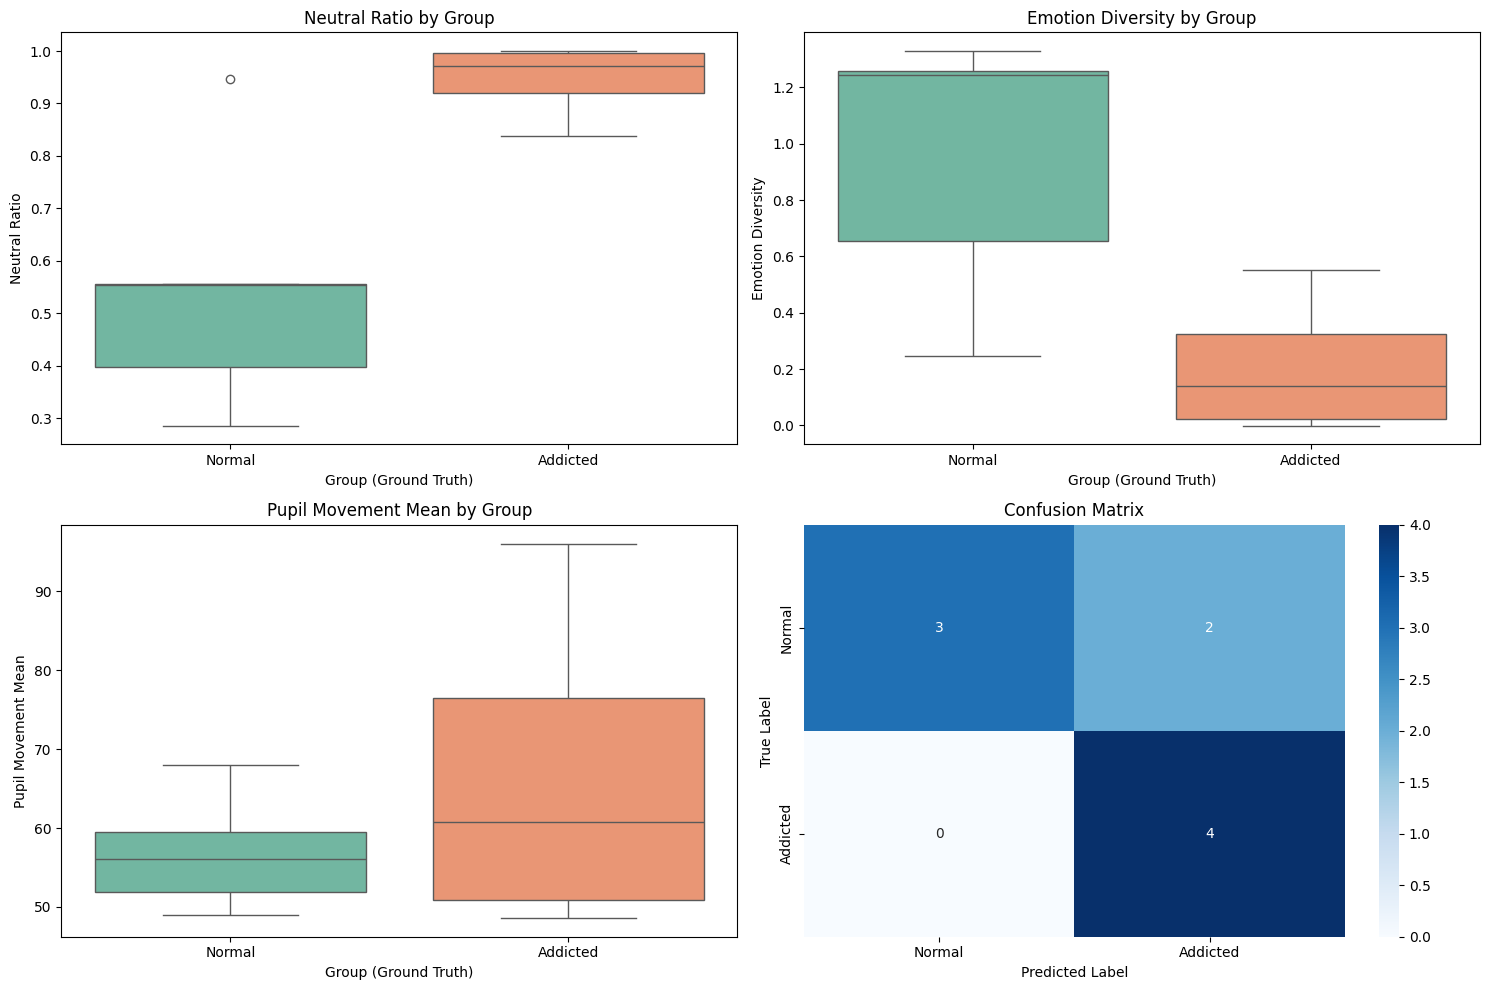

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Load the data
file_path = '/content/merge_data.csv'
data = pd.read_csv(file_path)

# Step 2: Calculate metrics
data['Pupil_Movement_Distance'] = np.sqrt(
    (data['Right_Pupil_X'] - data['Left_Pupil_X'])**2 +
    (data['Right_Pupil_Y'] - data['Left_Pupil_Y'])**2
)

metrics = pd.DataFrame(index=data['User'].unique())

# Neutral Ratio
neutral_ratio = (
    data[data['Emotion'] == 'neutral']
    .groupby('User')
    .size() / data.groupby('User').size()
)
metrics['Neutral_Ratio'] = neutral_ratio

# Pupil Movement Stats
movement_stats = data.groupby('User')['Pupil_Movement_Distance'].agg(['mean', 'std'])
metrics['Pupil_Movement_Mean'] = movement_stats['mean']
metrics['Pupil_Movement_Std'] = movement_stats['std']

# Pupil Size Variability
data['Pupil_Size'] = np.sqrt(
    (data['Right_Pupil_X'] - data['Left_Pupil_X'])**2 +
    (data['Right_Pupil_Y'] - data['Left_Pupil_Y'])**2
)
data['Pupil_Size_Change'] = data['Pupil_Size'].diff().fillna(0)
metrics['Pupil_Size_Variability'] = data.groupby('User')['Pupil_Size_Change'].std()

# Emotion Diversity
def calculate_emotion_diversity(group):
    proportions = group.value_counts(normalize=True)
    return -np.sum(proportions * np.log(proportions + 1e-9))
metrics['Emotion_Diversity'] = data.groupby('User')['Emotion'].apply(calculate_emotion_diversity)

# Predicted Alexithymia
metrics['Predicted_Alexithymia'] = (
    (metrics['Neutral_Ratio'] > 0.8) |
    (metrics['Emotion_Diversity'] < 1.0)
)

# Ground Truth
updated_ground_truth = {
    'KIM SEO YEONG': 'Normal',
    'KIM SEO YEONG 2': 'Normal',
    'SEONG YOUN JUN': 'Normal',
    'hha': 'Addicted',
    'hsm': 'Addicted',
    'kkk': 'Addicted',
    'kny': 'Normal',
    'ljk': 'Normal',
    'test1': 'Addicted'
}
metrics['Ground_Truth'] = metrics.index.map(updated_ground_truth)

# Prepare binary labels for evaluation
metrics['Ground_Truth_Binary'] = metrics['Ground_Truth'].map({'Addicted': 1, 'Normal': 0})
metrics['Predicted_Binary'] = metrics['Predicted_Alexithymia'].map({True: 1, False: 0})

# Step 3: Combined Subplot Visualization for Key Metrics and Confusion Matrix
plt.figure(figsize=(15, 10))

# Subplot 1: Neutral Ratio by Group
plt.subplot(2, 2, 1)
sns.boxplot(x=metrics['Ground_Truth'], y=metrics['Neutral_Ratio'], palette="Set2")
plt.title("Neutral Ratio by Group")
plt.xlabel("Group (Ground Truth)")
plt.ylabel("Neutral Ratio")

# Subplot 2: Emotion Diversity by Group
plt.subplot(2, 2, 2)
sns.boxplot(x=metrics['Ground_Truth'], y=metrics['Emotion_Diversity'], palette="Set2")
plt.title("Emotion Diversity by Group")
plt.xlabel("Group (Ground Truth)")
plt.ylabel("Emotion Diversity")

# Subplot 3: Pupil Movement Mean by Group
plt.subplot(2, 2, 3)
sns.boxplot(x=metrics['Ground_Truth'], y=metrics['Pupil_Movement_Mean'], palette="Set2")
plt.title("Pupil Movement Mean by Group")
plt.xlabel("Group (Ground Truth)")
plt.ylabel("Pupil Movement Mean")

# Subplot 4: Confusion Matrix
plt.subplot(2, 2, 4)
conf_matrix = confusion_matrix(metrics['Ground_Truth_Binary'], metrics['Predicted_Binary'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Normal', 'Addicted'], yticklabels=['Normal', 'Addicted'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Adjust layout
plt.tight_layout()
plt.show()


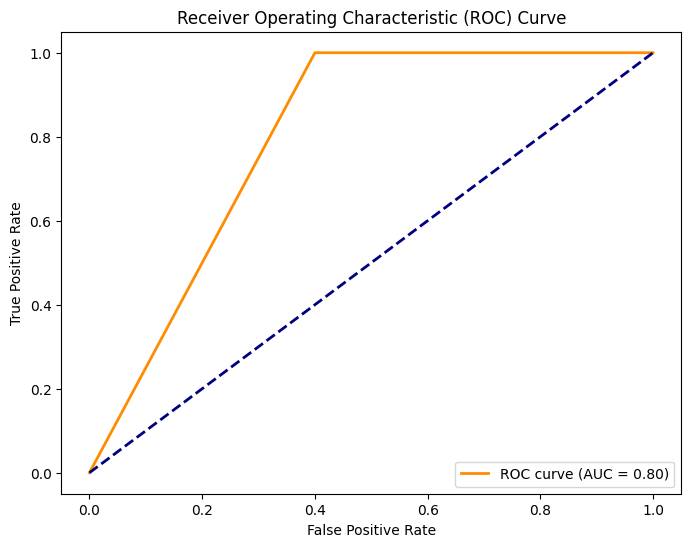

In [8]:
# Step 5: ROC Curve Visualization
fpr, tpr, _ = roc_curve(metrics['Ground_Truth_Binary'], metrics['Predicted_Binary'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
